(2000, 1968, 3)
Original entries: 11808000


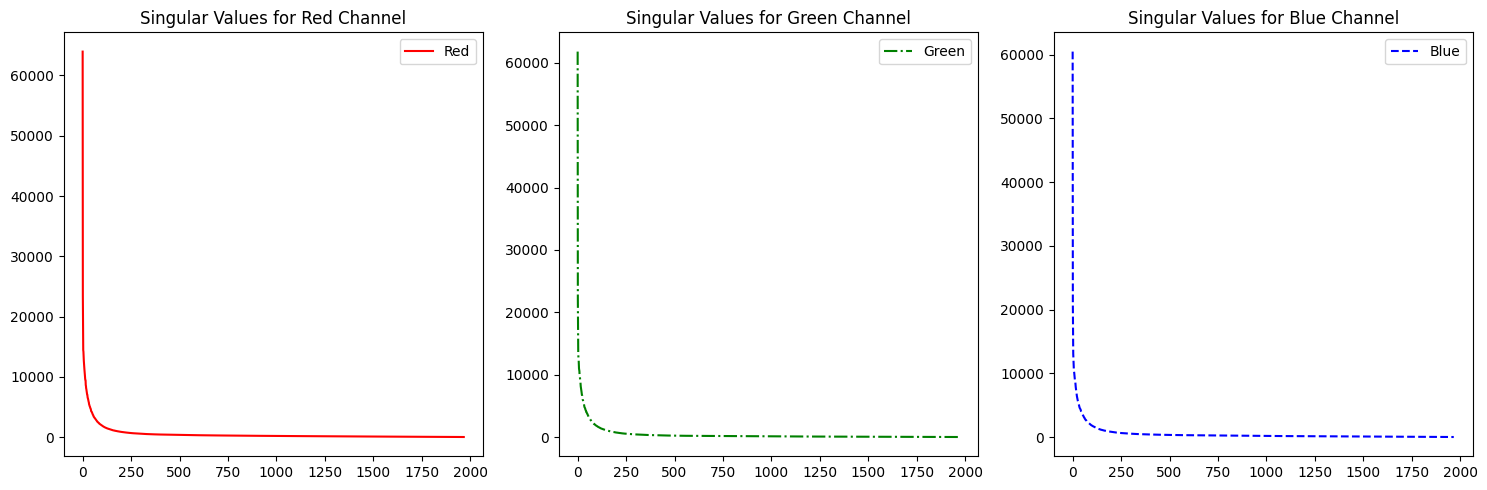

Number of singular values to capture 99% energy: (152, 116, 161)
Compressed entries: 1702272
Compression ratio: 0.14416260162601627


In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('image.png')
image = np.array(image)

# Separate the color channels
red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

print(image.shape)

l = red_channel.shape[0]
w = red_channel.shape[1]

original_entries = 3 * (l) * (w)

print(f"Original entries: {original_entries}")

# Function to compute SVD and reconstruct the image with k singular values
def compress_channel(channel, k):
    U, S, Vt = np.linalg.svd(channel, full_matrices=False)
    S = np.diag(S[:k])
    compressed_channel = np.dot(U[:, :k], np.dot(S, Vt[:k, :]))
    return compressed_channel

# Plot singular values for the red channel (as an example)
UR, SR, VRt = np.linalg.svd(red_channel, full_matrices=False)
UG, SG, VGt = np.linalg.svd(green_channel, full_matrices=False)
UB, SB, VBt = np.linalg.svd(blue_channel, full_matrices=False)
plt.figure(figsize=(15, 5))

# Plot singular values for the Red channel
plt.subplot(1, 3, 1)
plt.plot(SR, label="Red", color="red", linestyle="-")
plt.title("Singular Values for Red Channel")
plt.legend()

# Plot singular values for the Green channel
plt.subplot(1, 3, 2)
plt.plot(SG, label="Green", color="green", linestyle="-.")
plt.title("Singular Values for Green Channel")
plt.legend()

# Plot singular values for the Blue channel
plt.subplot(1, 3, 3)
plt.plot(SB, label="Blue", color="blue", linestyle="--")
plt.title("Singular Values for Blue Channel")
plt.legend()

plt.tight_layout()
plt.show()

# Determine k that captures the desired energy (e.g., 99%) for RED channel
total_energyR = np.sum(SR**2)
energyR = 0
kR = 0
while energyR / total_energyR < 0.99:
    energyR += SR[kR]**2
    kR += 1

# Determine k that captures the desired energy (e.g., 99%) for GREEN channel
total_energyG = np.sum(SG**2)
energyG = 0
kG = 0
while energyG / total_energyG < 0.99:
    energyG += SG[kG]**2
    kG += 1

# Determine k that captures the desired energy (e.g., 99%) for BLUE channel
total_energyB = np.sum(SB**2)
energyB = 0
kB = 0
while energyB / total_energyB < 0.99:
    energyB += SB[kB]**2
    kB += 1

# Print the number of singular values to capture 99% energy

print(f"Number of singular values to capture 99% energy: {kR, kG, kB}")

# Compress each channel using the found k
compressed_red = compress_channel(red_channel, kR)
compressed_green = compress_channel(green_channel, kG)
compressed_blue = compress_channel(blue_channel, kB)

# Reconstruct and save the compressed image
compressed_image = np.stack([compressed_red, compressed_green, compressed_blue], axis=2)
compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)
Image.fromarray(compressed_image).save('compressed.png')

# Calculate number of entries to transmit
entries_to_transmit = (l*kR + l*kG + l*kB) + (w*kR + w*kG + w*kB)
compression_ratio = entries_to_transmit / original_entries

print(f"Compressed entries: {entries_to_transmit}")
print(f"Compression ratio: {compression_ratio}")





In [2]:
# Compute norm errors
norm_2_red = np.linalg.norm(red_channel - compressed_red, ord=2)
norm_F_red = np.linalg.norm(red_channel - compressed_red, ord='fro')
sigma_red_k = SR[kR]
sum_of_squares = np.sum(SR[kR:]**2)
print("Red : ", norm_2_red, sigma_red_k, norm_F_red, np.sqrt(sum_of_squares))

norm_2_green = np.linalg.norm(green_channel - compressed_green, ord=2)
norm_F_green = np.linalg.norm(green_channel - compressed_green, ord='fro')
sigma_green_k = SG[kG]
sum_of_squares = np.sum(SG[kG:]**2)
print("Green : ",norm_2_green, sigma_green_k, norm_F_green, np.sqrt(sum_of_squares))

norm_2_blue = np.linalg.norm(blue_channel - compressed_blue, ord=2)
norm_F_blue = np.linalg.norm(blue_channel - compressed_blue, ord='fro')
sigma_blue_k = SB[kB]
sum_of_squares = np.sum(SB[kB:]**2)
print("Blue : ",norm_2_blue, sigma_blue_k, norm_F_blue, np.sqrt(sum_of_squares))



Red :  1155.4466931285447 1155.4466931285465 13105.760530005482 13105.760530005482
Green :  1458.9746100202265 1458.9746100202262 12382.687698080597 12382.6876980806
Blue :  1028.0046521956378 1028.0046521956365 12030.839786374981 12030.839786374981


In [3]:
UR.shape, SR.shape, VRt.shape

((2000, 1968), (1968,), (1968, 1968))